# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [9]:
df.shape

(130, 3)

__QUESTION 1 & 2__

__Answer__: Yes, we can say distribution of temperature is normal by looking at QQplot and tests.

The sample size is large

In [15]:
import numpy as np 
import scipy.stats as stats
import pylab



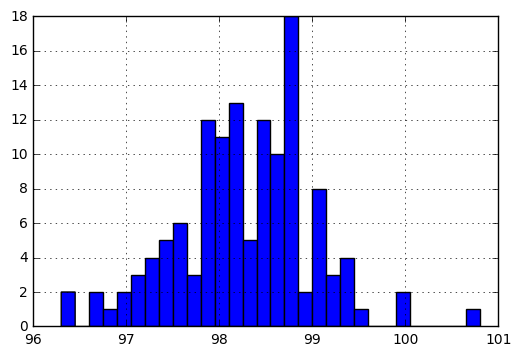

In [18]:
df['temperature'].hist(bins=30)

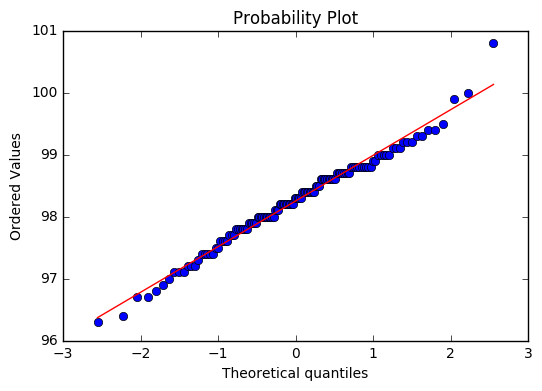

In [72]:
# import matplotlib as plt
_=stats.probplot(df['temperature'], dist="norm", plot=pylab)

__Yes, we can say distribution of temperature is normal__

__QUESTION 3__

Is the true population mean really 98.6 degrees F?
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?         

__Answer__: One-sample test, because we don't compare two 
- In this situation, is it appropriate to use the $t$ or $z$ statistic?

__Answer__: Because the distribution is normal and we don't know the true standard deviation, t statistic is more suitable
- Now try using the other test. How is the result be different? Why?

__Answer__: The result of two tests are not so different. Because the number of samples are large (150)

- Null Hypothesis: true mean = 98.6
- Alternative Hypothesis: true mean != 98.6

With small value of p we can say the true mean is not 98.6

In [32]:
# First try bootstrap
bs_sample = []
num_bs = 1000
size_bs = 100
for i in range(num_bs):
    _ = list(np.random.choice(df['temperature'],size=size_bs))
    bs_sample = bs_sample + _

np.mean(bs_sample)

98.251001000000016

In [46]:
# Try t-test
from scipy.stats import ttest_1samp
ttest = ttest_1samp(df['temperature'],popmean=98.6)
ttest

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [43]:
# Second try one-sample ztest
from statsmodels.stats.weightstats import ztest
z_test = ztest(df['temperature'],value=98.6)
print('Test Statistic: ',z_test[0])
print('pvalue: ',z_test[1])

Test Statistic:  -5.45482329236
pvalue:  4.9021570141e-08


__QUESTION 4__ Draw a small sample of size 10 from the data and repeat both frequentist tests. 
 - Which one is the correct one to use? 
 
 __Answer__: T Statistic
 
 - What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
 
 __Answer__: In case of distribution is normal, if we know true standard deviation, we should use z-test, otherwise use t-test


In [47]:
small_sample = list(np.random.choice(df['temperature'],size=10))
small_sample

[97.799999999999997,
 98.200000000000003,
 96.299999999999997,
 99.299999999999997,
 100.8,
 98.799999999999997,
 97.200000000000003,
 97.599999999999994,
 97.599999999999994,
 98.900000000000006]

In [48]:
ttest_small = ttest_1samp(small_sample,popmean=98.6)
ttest_small

Ttest_1sampResult(statistic=-0.87851499101008301, pvalue=0.40250897217425174)

In [49]:
z_test_small = ztest(small_sample,value=98.6)
print('Test Statistic: ',z_test_small[0])
print('pvalue: ',z_test_small[1])

Test Statistic:  -0.87851499101
pvalue:  0.379664305997


__QUESTION 5__: 
 - At what temperature should we consider someone's temperature to be "abnormal"?  
 - As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 
 
 __Answer__: Estimate the mean = 98.25 and standard deviation = 0.73, critical value is 2.575, sample size 130 
 So if someone's temperature is over  $98.25 + 2.575 \sqrt{\frac{0.73}{130}} = 98.43$  or below$98.25 + 2.575 \sqrt{\frac{0.73}{130}} = 98.06$  we would consider abnormal

In [53]:
bs_sample = []
num_bs = 1000
size_bs = 100
for i in range(num_bs):
    _ = list(np.random.choice(df['temperature'],size=size_bs))
    bs_sample = bs_sample + _


In [64]:
from scipy.stats import norm
z_critical_value = norm.ppf(0.995)
z_critical_value

2.5758293035489004

In [81]:
mean = np.mean(bs_sample)
mean

98.248970499999984

In [82]:
std = np.std(bs_sample)
std

0.72923005980948818

In [83]:
conf_int = stats.norm.interval(0.995, loc=mean, scale=std / np.sqrt(130))
conf_int

(98.069439056178638, 98.428501943821331)

__QUESTION 6__:

Is there a significant difference between males and females in normal temperature? 
- What testing approach did you use and why? 

__Answer__: we would use two-sample t-test in this case.
 - Null Hypothesis: two means are the same
 - Alternative Hypothesis: two means are different

- Write a story with your conclusion in the context of the original problem. 

__Conclusion__: For more than 120 years, people have believed that the mean normal body temperaure was at 37$^{\circ}$C or 98.6$^{\circ}$F However this number is not true. The correct result should be 98.25$^{\circ}$F or 36.81$^{\circ}$F. And if oneday, your temperature is increase over  98.44$^{\circ}$F or decrease below  98.06$^{\circ}$F you should go to see doctor because something is wrong with your body.
However there is a difference between two genders. If you are a man, a "safe zone" for you body temperature is from 98.86 to 98.35. If you are a woman, your "safe zone" is from 98.17 to 98.65

In [71]:
from scipy.stats import ttest_ind
temp_female = df.loc[df['gender']=='F','temperature']
temp_male = df.loc[df['gender']=='M','temperature']
ttest = ttest_ind(temp_female,temp_male)
ttest

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

In [84]:
np.mean(temp_male)
stats.norm.interval(0.995, loc=np.mean(temp_male), scale=np.std(temp_male) / np.sqrt(len(temp_male)))

(97.863208489762997, 98.346022279467746)

In [85]:
np.mean(temp_female)
stats.norm.interval(0.995, loc=np.mean(temp_female), scale=np.std(temp_female) / np.sqrt(len(temp_female)))

(98.136985202674822, 98.65070710501746)